In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-social-media/Mental-Health-Twitter.csv


In [2]:
# import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading our dataset
dataset = pd.read_csv("Mental-Health-Twitter.csv")

In [4]:
dataset.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [6]:
dataset.describe()

,Unnamed: 0,post_id,user_id,followers,friends,favourites,statuses,retweets,label
count,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000
mean,9999.500000,6.874728e+17,3.548623e+16,900.483950,782.428750,6398.235550,4.439442e+04,1437.927300,0.500000
std,5773.647028,1.708396e+17,1.606083e+17,1899.913961,1834.817945,8393.072914,1.407785e+05,15119.665118,0.500013
min,0.000000,3.555966e+09,1.472438e+07,0.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,4999.750000,5.931686e+17,3.242944e+08,177.000000,211.000000,243.000000,5.129000e+03,0.000000,0.000000
50%,9999.500000,7.637400e+17,1.052122e+09,476.000000,561.000000,2752.000000,1.325100e+04,0.000000,0.500000
75%,14999.250000,8.153124e+17,2.285923e+09,1197.000000,701.000000,8229.000000,5.289200e+04,1.000000,1.000000
max,19999.000000,8.194574e+17,7.631825e+17,28614.000000,28514.000000,39008.000000,1.063601e+06,839540.000000,1.000000


In [7]:
type(dataset)

pandas.core.frame.DataFrame

In [8]:
# taking only tweets and labels
data = pd.DataFrame()
data['tweets'] = dataset['post_text']
data['label'] = dataset['label']

In [9]:
data.head()

,tweets,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,It’s hard to say whether packing lists are mak...,1


Text(0.5, 1.0, 'Distribution of data for each label')

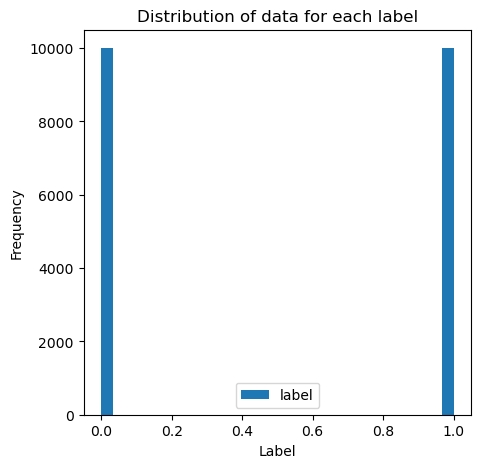

In [10]:
# plotting the distribution of labels
fig1 = data.plot(bins = 30, figsize = (5,5), kind = 'hist')
fig1.set_xlabel('Label')
fig1.set_title("Distribution of data for each label")

In [11]:
data['length'] = data['tweets'].apply(len)

In [12]:
data.describe()

,label,length
count,20000.000000,20000.000000
mean,0.500000,82.462950
std,0.500013,38.281974
min,0.000000,4.000000
25%,0.000000,50.000000
50%,0.500000,77.000000
75%,1.000000,118.000000
max,1.000000,169.000000


In [13]:
data[data['label']==0]['tweets']

10000     MY ENEMY'S INVISIBLE , I DON'T KNOW HOW TO FIGHT
10001       im gonna burn my house down into an ugly brack
10002                        @HOT_cocoa_____ counterattack
10003                          @noob_aspe810 golden.ta-chi
10004                                   lol or spl or drow
                               ...                        
19995                A day without sunshine is like night.
19996    Boren's Laws: (1) When in charge, ponder. (2) ...
19997    The flow chart is a most thoroughly oversold p...
19998    Ships are safe in harbor, but they were never ...
19999       Black holes are where God is dividing by zero.
Name: tweets, Length: 10000, dtype: object

In [14]:
depressed = data[data['label']==1]
neutral = data[data['label']==0]

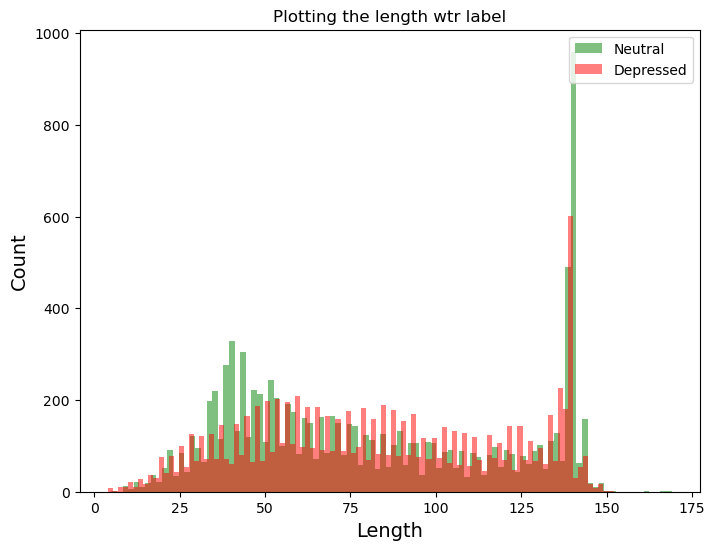

In [15]:
plt.figure(figsize=(8,6))
#plt.hist(data['length'], bins=100, alpha=0.5, label="All")
plt.hist(neutral['length'], bins=100, alpha=0.5,color = 'g', label="Neutral")
plt.hist(depressed['length'], bins=100, alpha=0.5,color = 'r', label="Depressed")
plt.xlabel("Length", size=14)
plt.ylabel("Count", size=14)
plt.title("Plotting the length wtr label")
plt.legend(loc='upper right')


TEXT PROCESSING and WORD CLOUDS

In [16]:
import string

In [26]:
import nltk 
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haseeb/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
depressed_corpus = []

In [29]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
# Removing special characters and stop words
for i in range(0,len(depressed)):
    review = re.sub('[^a-zA-Z]',' ',depressed['tweets'][i])
    review = review.lower()
    review = review.split()

    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    depressed_corpus.append(review)

In [31]:
depressed_corpus_sentence = ' '.join(depressed_corpus)

In [32]:
depressed_corpus_sentence

'years since diagnosed anxiety depression today taking moment reflect far come since sunday need break planning spend little time possible awake tired need sleep brain ideas rt sewhq retro bears make perfect gifts great beginners get stitching october sew sale yay http co hard say whether packing lists making life easier reinforcing much still needs movinghouse anxiety making packing lists new hobby movinghouse point keeping stuff nostalgic reasons cross line plain old hoarding movinghouse currently finding boxes random shit packing phase think closet hoarder bothered cook take away way lazy rt itventsnews itv releases promo video final series downton abbey http co mc ive zr http co cfbkrrvjis also much stuff way way much movinghouse never want put one together lotharderthanitlooks http co ujltcklb moving stuff bloomin knackering still loads back house moving stuff peaceful urgh anxiety ffs come breathe much stuff way way much massive purge way hideous traffic must remember pay closer 

In [33]:
!pip install wordcloud

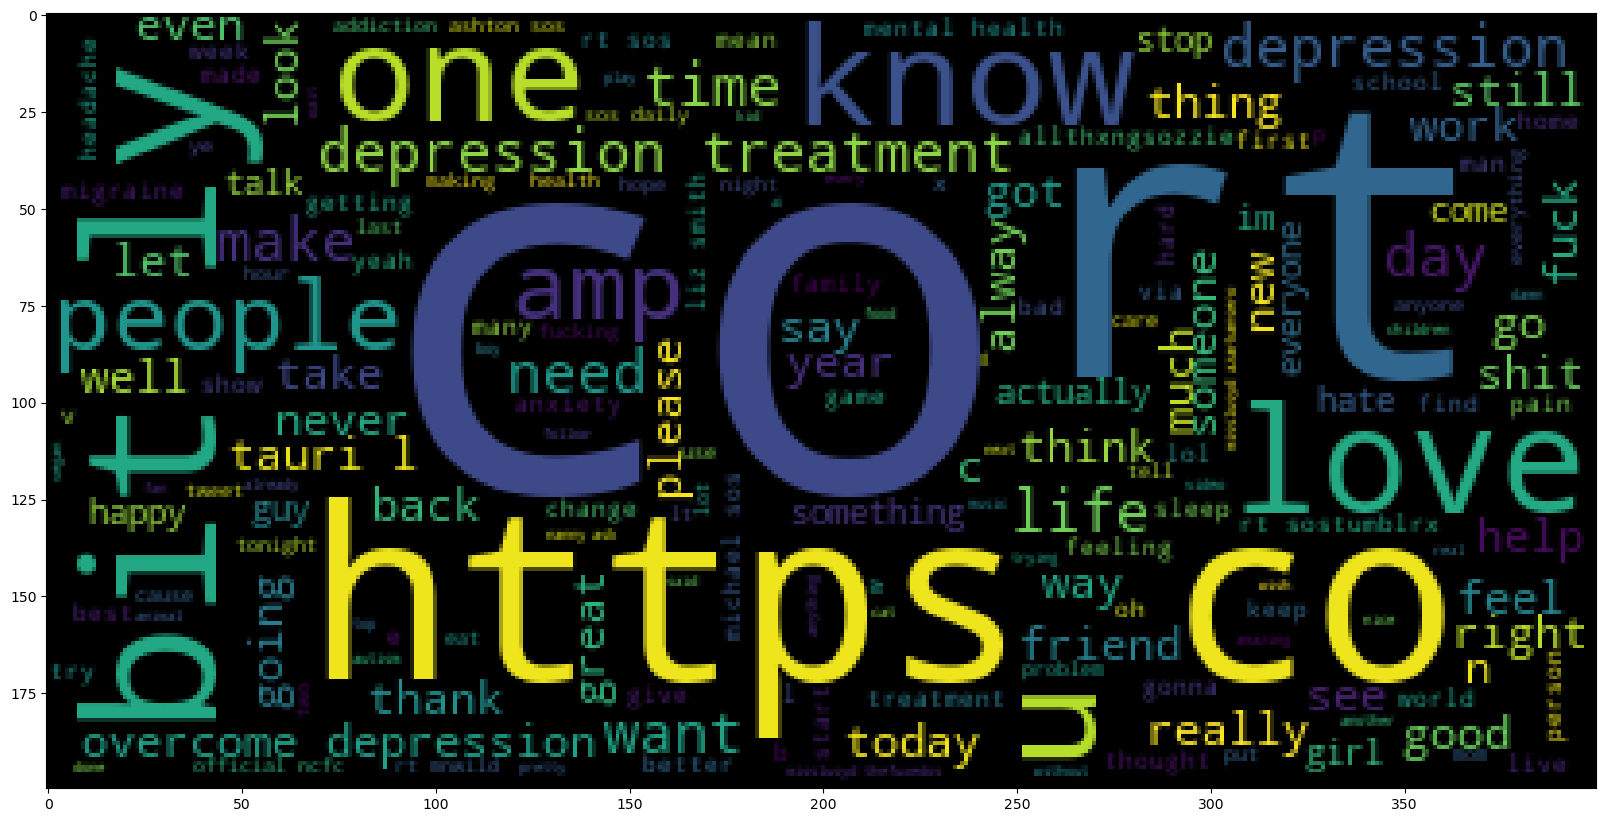

In [34]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(depressed_corpus_sentence))

In [35]:
neutral_corpus = []


In [36]:
for i in range(len(neutral)):
    review = re.sub('[^a-zA-Z]',' ',neutral['tweets'][i+10000])
    review = review.lower()
    review = review.split()

    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    neutral_corpus.append(review)

In [37]:
neutral_corpus_sentence = ' '.join(neutral_corpus)

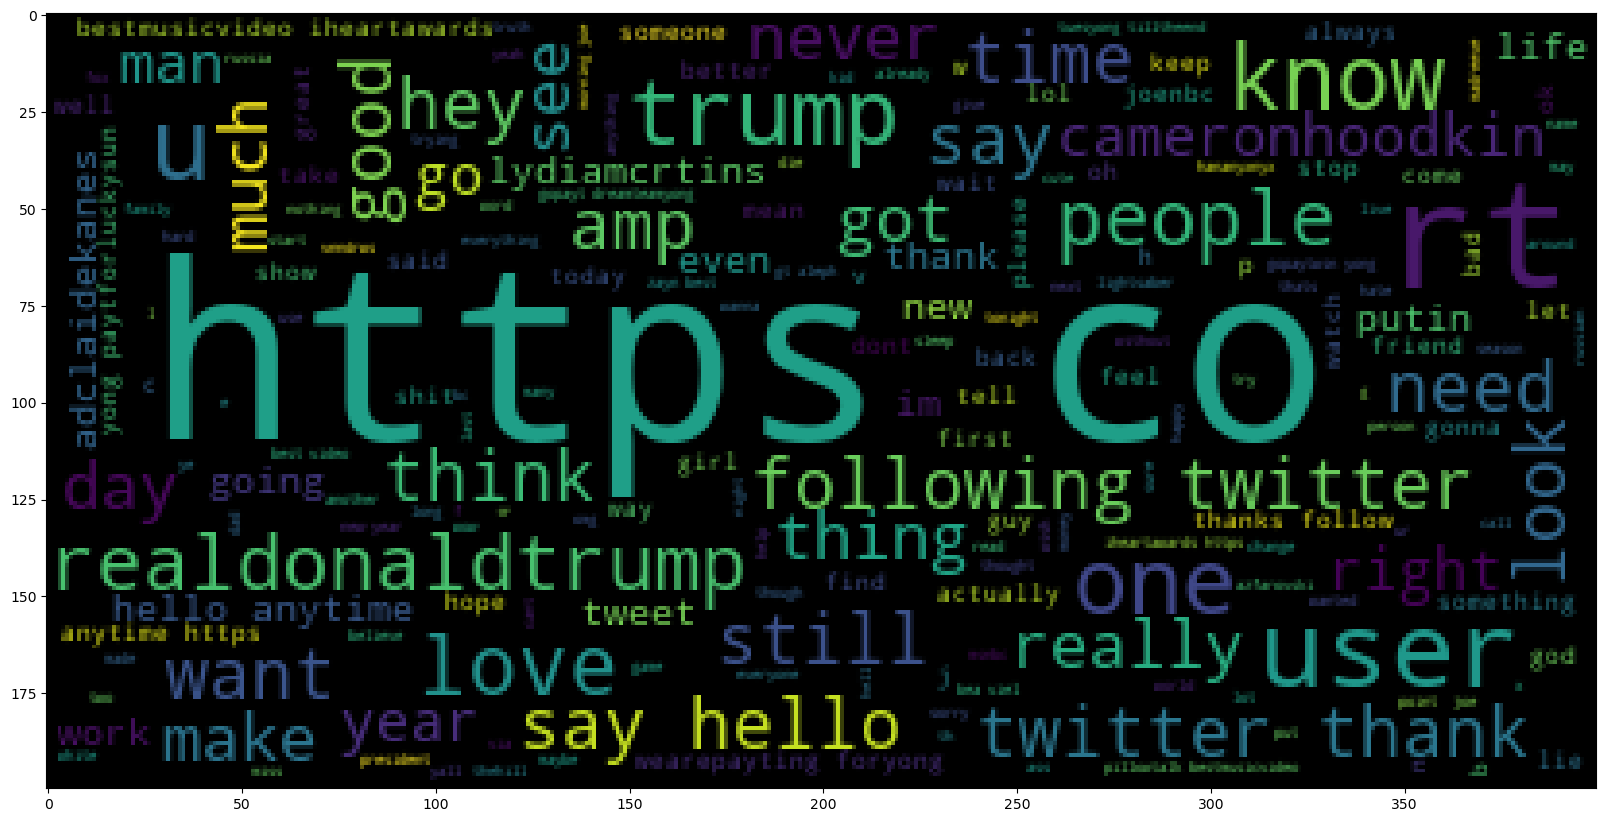

In [38]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(neutral_corpus_sentence))

In [28]:
# lemmatizing and creating final corpus

In [45]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/haseeb/nltk_data...


True

In [48]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/haseeb/nltk_data...


True

In [49]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [50]:
corpus = []

for sentence in depressed_corpus:
    sentence = sentence.split()
    sentence = ' '.join([lm.lemmatize(word) for word in sentence])
    corpus.append(sentence)
    
for sentence in neutral_corpus:
    sentence = sentence.split()
    sentence = ' '.join([lm.lemmatize(word) for word in sentence])
    corpus.append(sentence)

In [51]:
corpus[0]

'year since diagnosed anxiety depression today taking moment reflect far come since'

TOKENIZATION, MODEL EVALUATION

In [52]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [53]:
X.shape

(20000, 31711)

In [54]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
y = data['label']

In [56]:
y.shape

(20000,)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [59]:
model = MultinomialNB().fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.875

<AxesSubplot:>

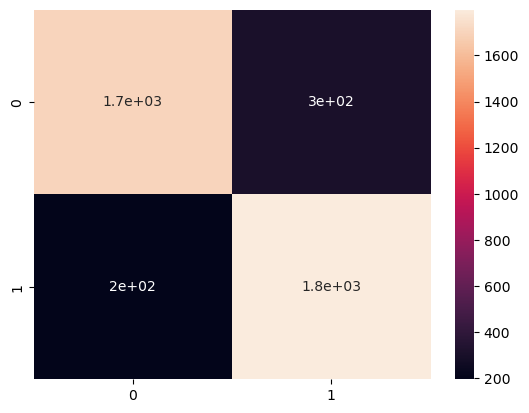

In [60]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
#SVC
from sklearn.svm import SVC
model2 = SVC().fit(X_train,y_train)

y_pred2 = model2.predict(X_test)

accuracy_score(y_test,y_pred2)

In [ ]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True)